In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# import torch
import csv
import numpy as np
plt.rcParams['figure.figsize'] = [40, 20]
plt.rcParams.update({'font.size': 22})

In [5]:
# path_to_csv = './nn_linear_varying_widths_batches_results.csv'
# path_to_csv = './crs_det_top_k_k_64_varying_widths_batches_results.csv'
path_to_csv = './crs_det_top_k_compare_jit_nojit_full_sweep_batch_k_dims.csv'
data = np.genfromtxt(path_to_csv, delimiter=',', names=True, dtype=None)

In [6]:
data.shape, data

((720,),
 array([(1000, 0,    1,  64,   64,   64, 0.350752  , 0.47216001, 0.072832  ),
        (1000, 0,    1,  64,   64,  128, 0.37510401, 0.42838401, 0.07072   ),
        (1000, 0,    1,  64,   64,  256, 0.34832001, 0.425376  , 0.070464  ),
        (1000, 0,    1,  64,   64,  512, 0.46912   , 0.55136001, 0.09504   ),
        (1000, 0,    1,  64,   64, 1024, 0.36384001, 0.40780801, 0.070656  ),
        (1000, 0,    1,  64,   64, 2048, 0.47094399, 0.54643202, 0.09424   ),
        (1000, 0,    1,  64,  128,   64, 0.62956798, 0.53612798, 0.094496  ),
        (1000, 0,    1,  64,  128,  128, 0.45580801, 0.548576  , 0.095936  ),
        (1000, 0,    1,  64,  128,  256, 0.34611201, 0.42719999, 0.071648  ),
        (1000, 0,    1,  64,  128,  512, 0.45804799, 0.56348801, 0.093696  ),
        (1000, 0,    1,  64,  128, 1024, 0.47043201, 0.52889597, 0.109888  ),
        (1000, 0,    1,  64,  128, 2048, 0.47088   , 0.52905601, 0.09488   ),
        (1000, 0,    1,  64,  256,   64, 0.36803201, 0.

In [7]:
unique_batches = np.unique(data['batch'])
unique_batches

array([   1,    2,    4,    8,   16,   32,   64,  128,  256,  512, 1024,
       2048])

In [8]:
unique_input_dims = np.unique(data['input_dim'])
unique_input_dims

array([  64,  128,  256,  512, 1024, 2048])

In [9]:
data_batch_1 = data[data['batch'] == 1]
data_batch_1.shape

(60,)

In [10]:
data_batch_1_input_dim_1 = data_batch_1[data_batch_1['input_dim'] == 1]
data_batch_1_input_dim_1.shape

(0,)

In [11]:
data_batch_1_input_dim_2 = data_batch_1[data_batch_1['input_dim'] == 1]
data_batch_1_input_dim_2.shape

(0,)

In [14]:
data.dtype

dtype([('steps', '<i8'), ('profiled_steps', '<i8'), ('batch', '<i8'), ('k', '<i8'), ('input_dim', '<i8'), ('output_dim', '<i8'), ('mean_runtime_jit_ms', '<f8'), ('mean_runtime_nojit_ms', '<f8'), ('mean_runtime_full_ms', '<f8')])

In [63]:
FIELD = 'mean_forward_time(ms)'
FIELD = 'mean_runtime_jit_ms'
FIELD = 'mean_runtime_nojit_ms'
FIELD = 'mean_runtime_full_ms'

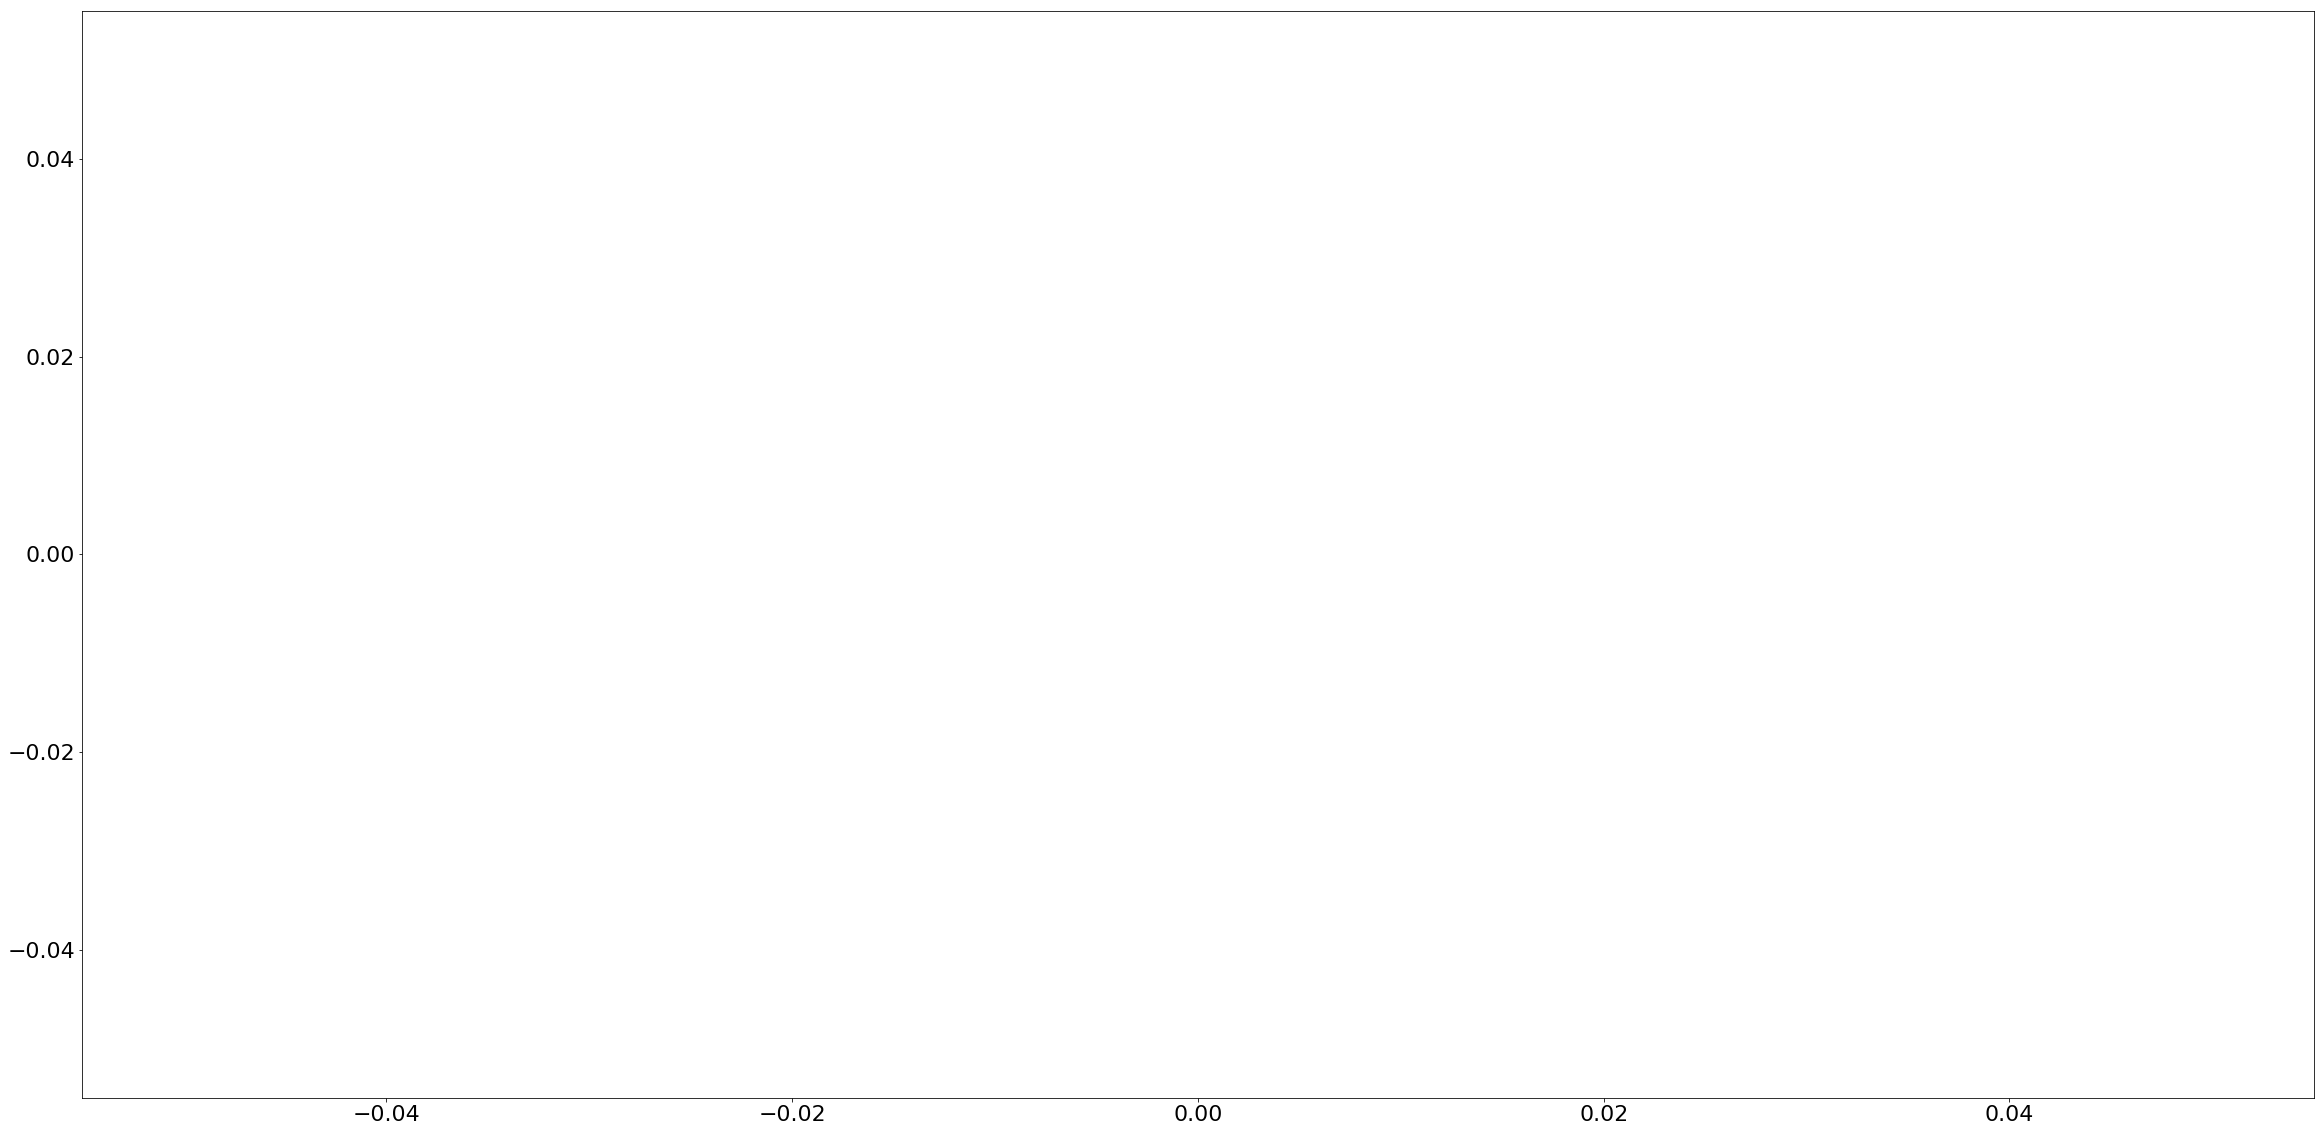

In [16]:
plt.plot(data_batch_1_input_dim_1[FIELD], label='data_batch_1_input_dim_1')

Text(0.5, 1.0, 'batch=1 mean_forward_time(ms) vs output_dim')

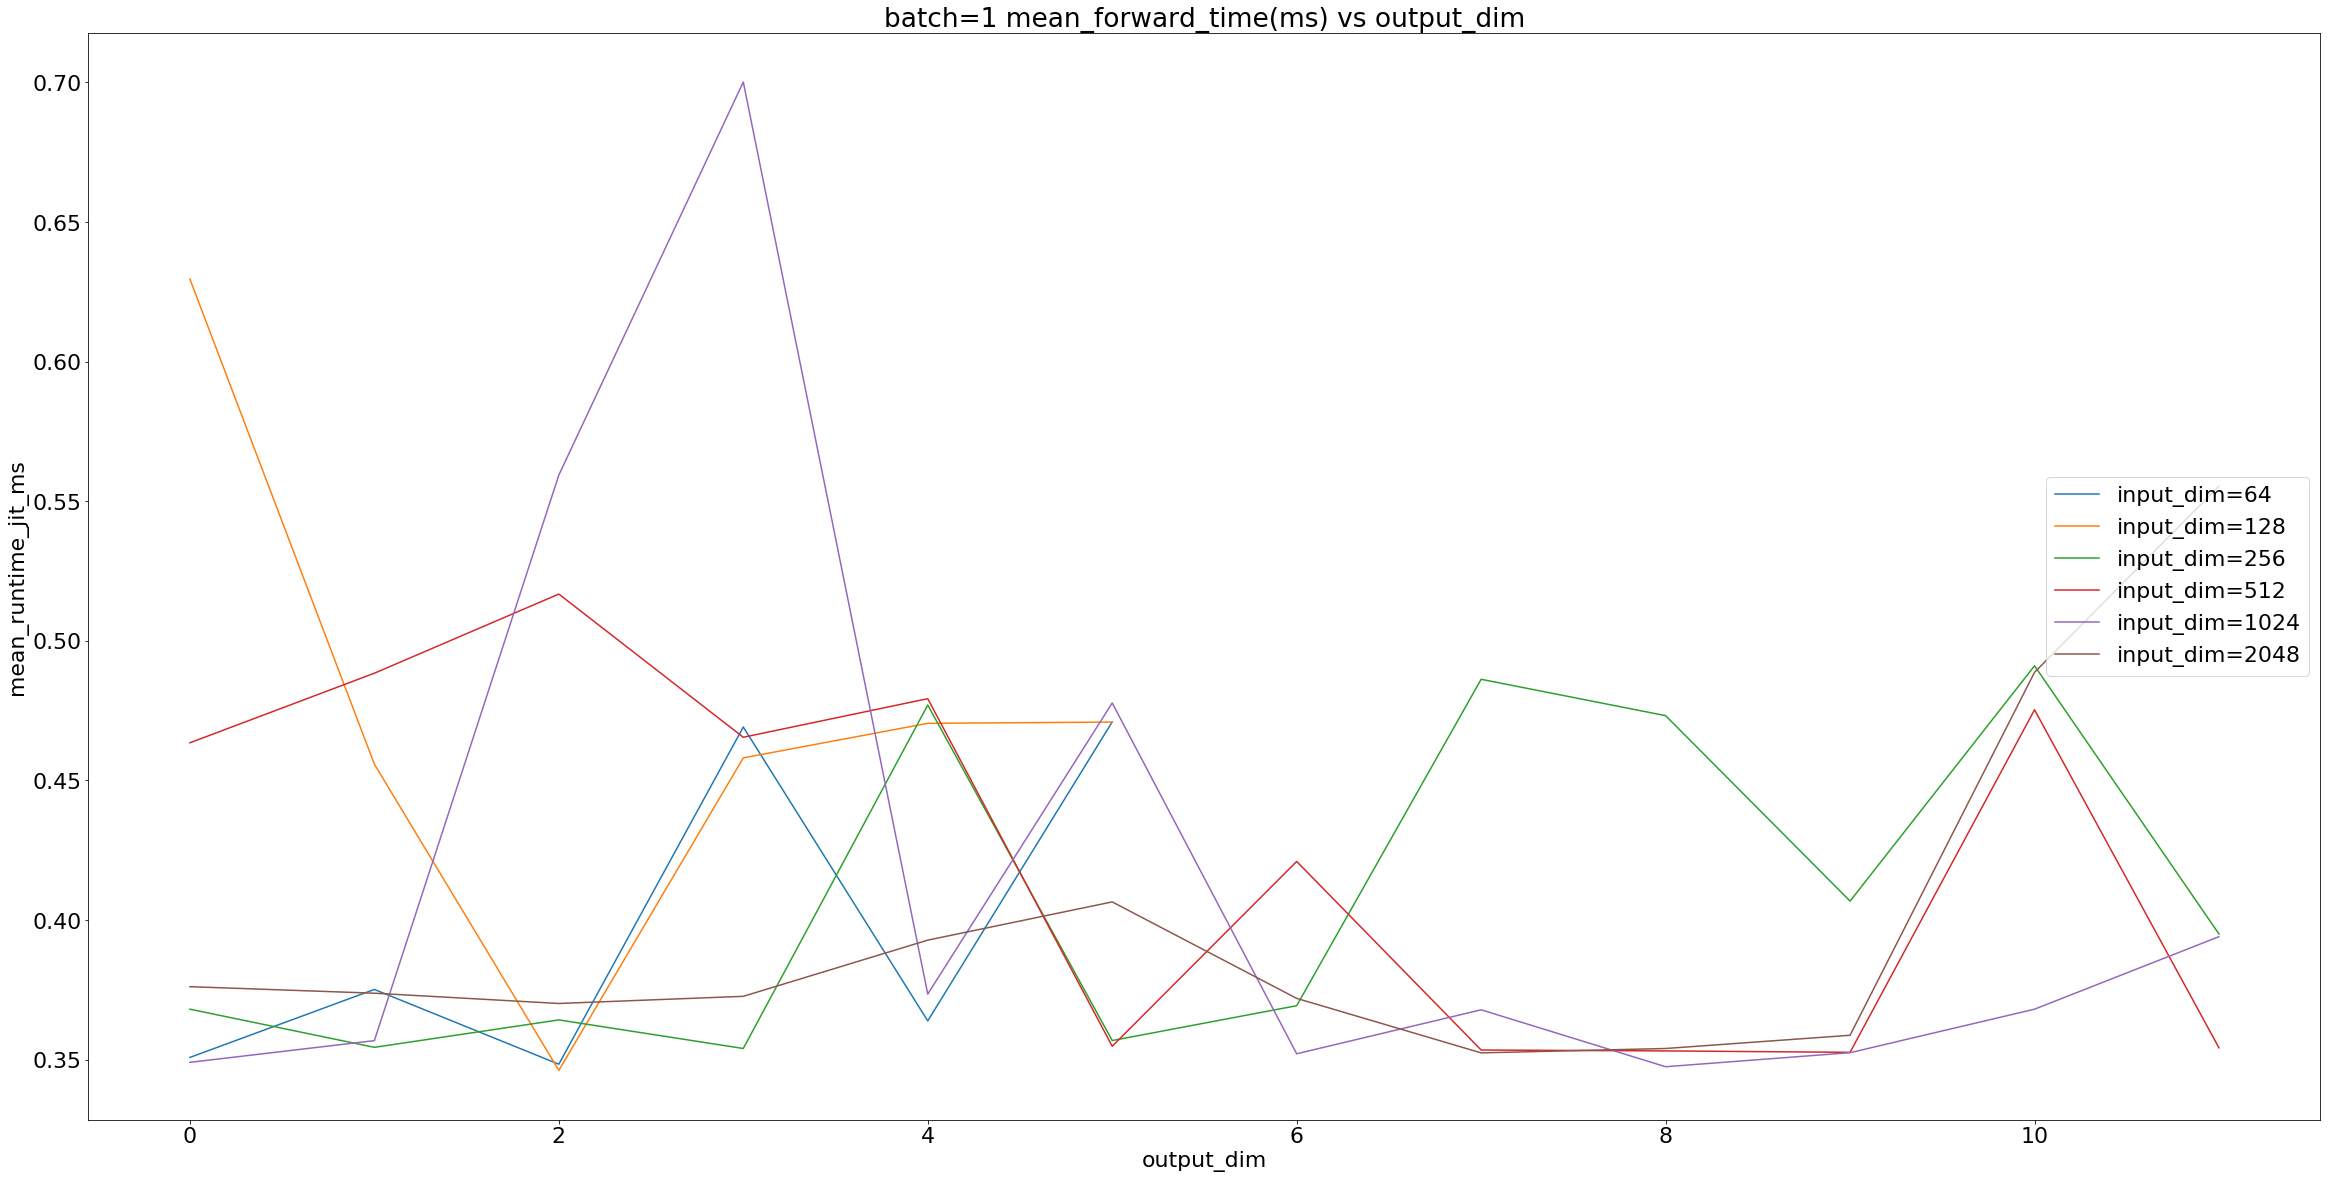

In [23]:
for i in unique_input_dims:
    data_batch_1_input_dim_i = data_batch_1[data_batch_1['input_dim'] == i]
    plt.plot(data_batch_1_input_dim_i[FIELD], label='input_dim={}'.format(i))
plt.legend(loc='right')
plt.xlabel('output_dim')
plt.ylabel('mean_runtime_jit_ms')
plt.title('batch=1 mean_forward_time(ms) vs output_dim')

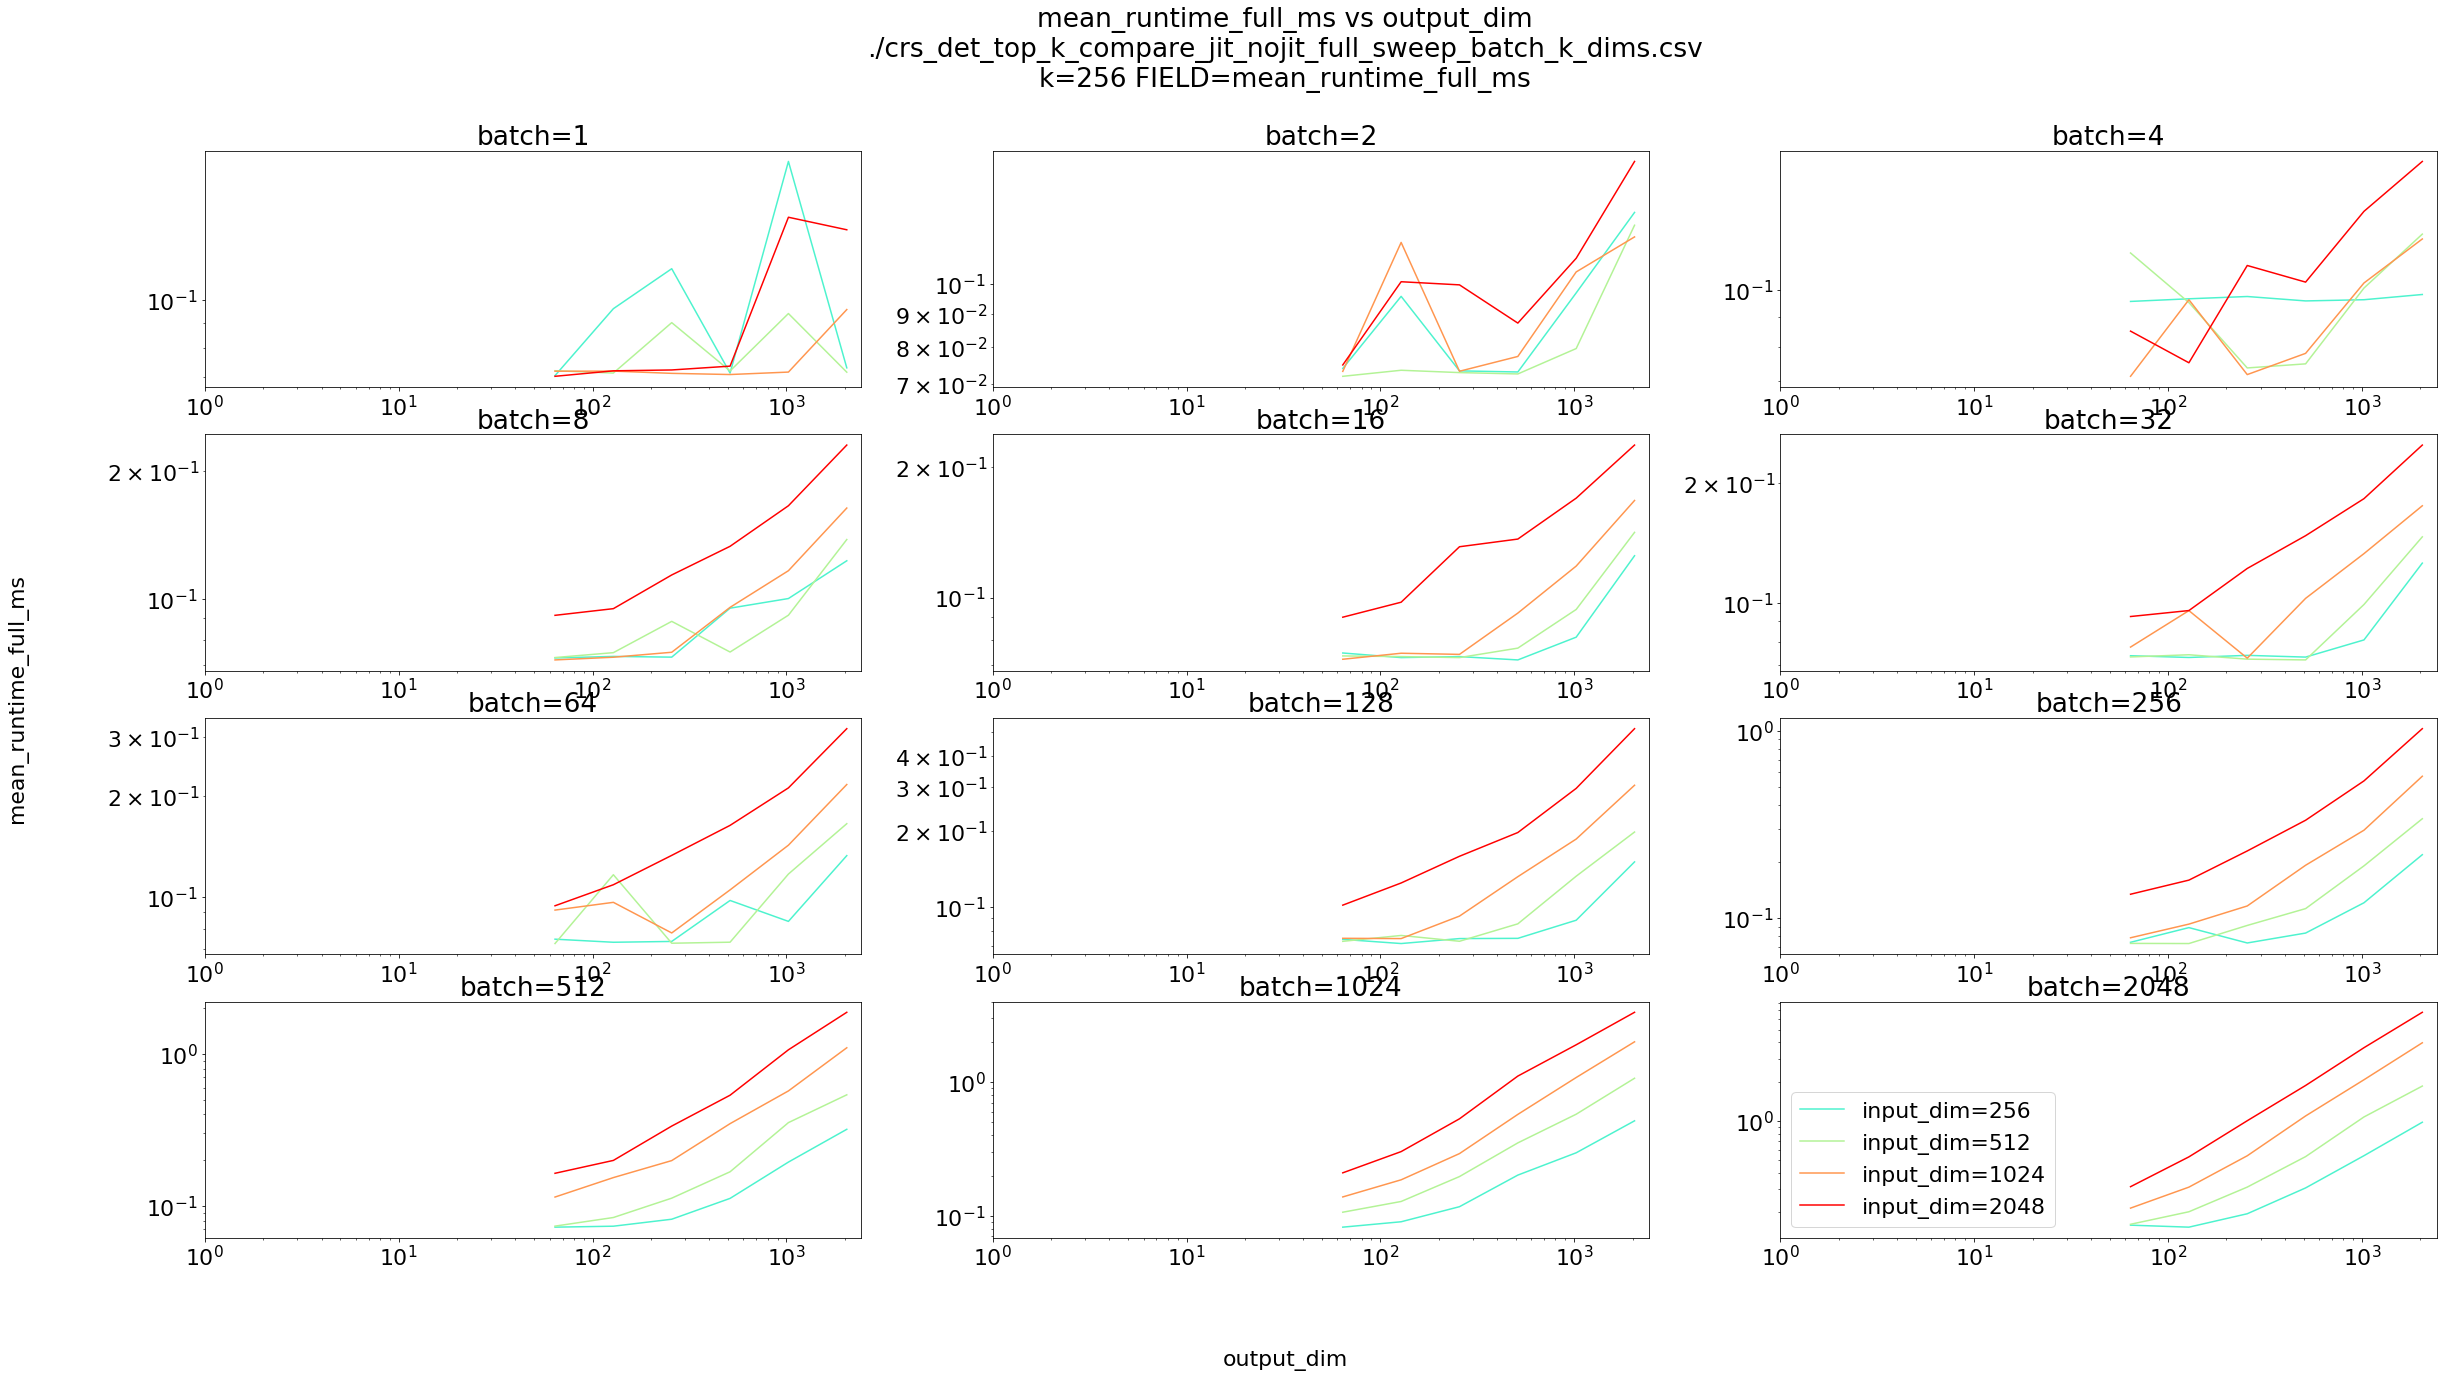

In [64]:
fig, axs = plt.subplots(4, 3)
colors = cm.rainbow(np.linspace(0, 1, len(unique_input_dims)))
FIXED_K = 256

for batch_number, batch in enumerate(unique_batches):
    data_batch_j = data[data['batch'] == batch]
    ax = axs.flat[batch_number]
    for number, i in enumerate(unique_input_dims):
        data_batch_j_input_dim_i__many_k = data_batch_j[data_batch_j['input_dim'] == i]
        data_batch_j_input_dim_i = data_batch_j_input_dim_i__many_k[data_batch_j_input_dim_i__many_k['k'] == FIXED_K]  # fix the k
        unique_output_dims = np.unique(data_batch_j_input_dim_i['output_dim'])
        if len(data_batch_j_input_dim_i[FIELD]) == 0:
            continue
        ax.plot(unique_output_dims, data_batch_j_input_dim_i[FIELD], label='input_dim={}'.format(i), c=colors[number])
        ax.title.set_text('batch={}'.format(batch))
        ax.set_yscale('log')  # comment this out for normal plot.
        ax.set_xscale('log')  # comment this out for normal plot.
        ax.set_xlim(left=1)

plt.suptitle(FIELD+' vs output_dim\n'+path_to_csv+'\nk={} FIELD={}'.format(FIXED_K, FIELD))
plt.legend(loc='lower left')
fig.text(0.5, 0.04, 'output_dim', ha='center', va='center')
fig.text(0.06, 0.5, FIELD, ha='center', va='center', rotation='vertical')
plt.savefig(path_to_csv + 'k={} FIELD={}'.format(FIXED_K, FIELD) + '.png')

Text(0.06, 0.5, 'mean_forward_time(ms)')

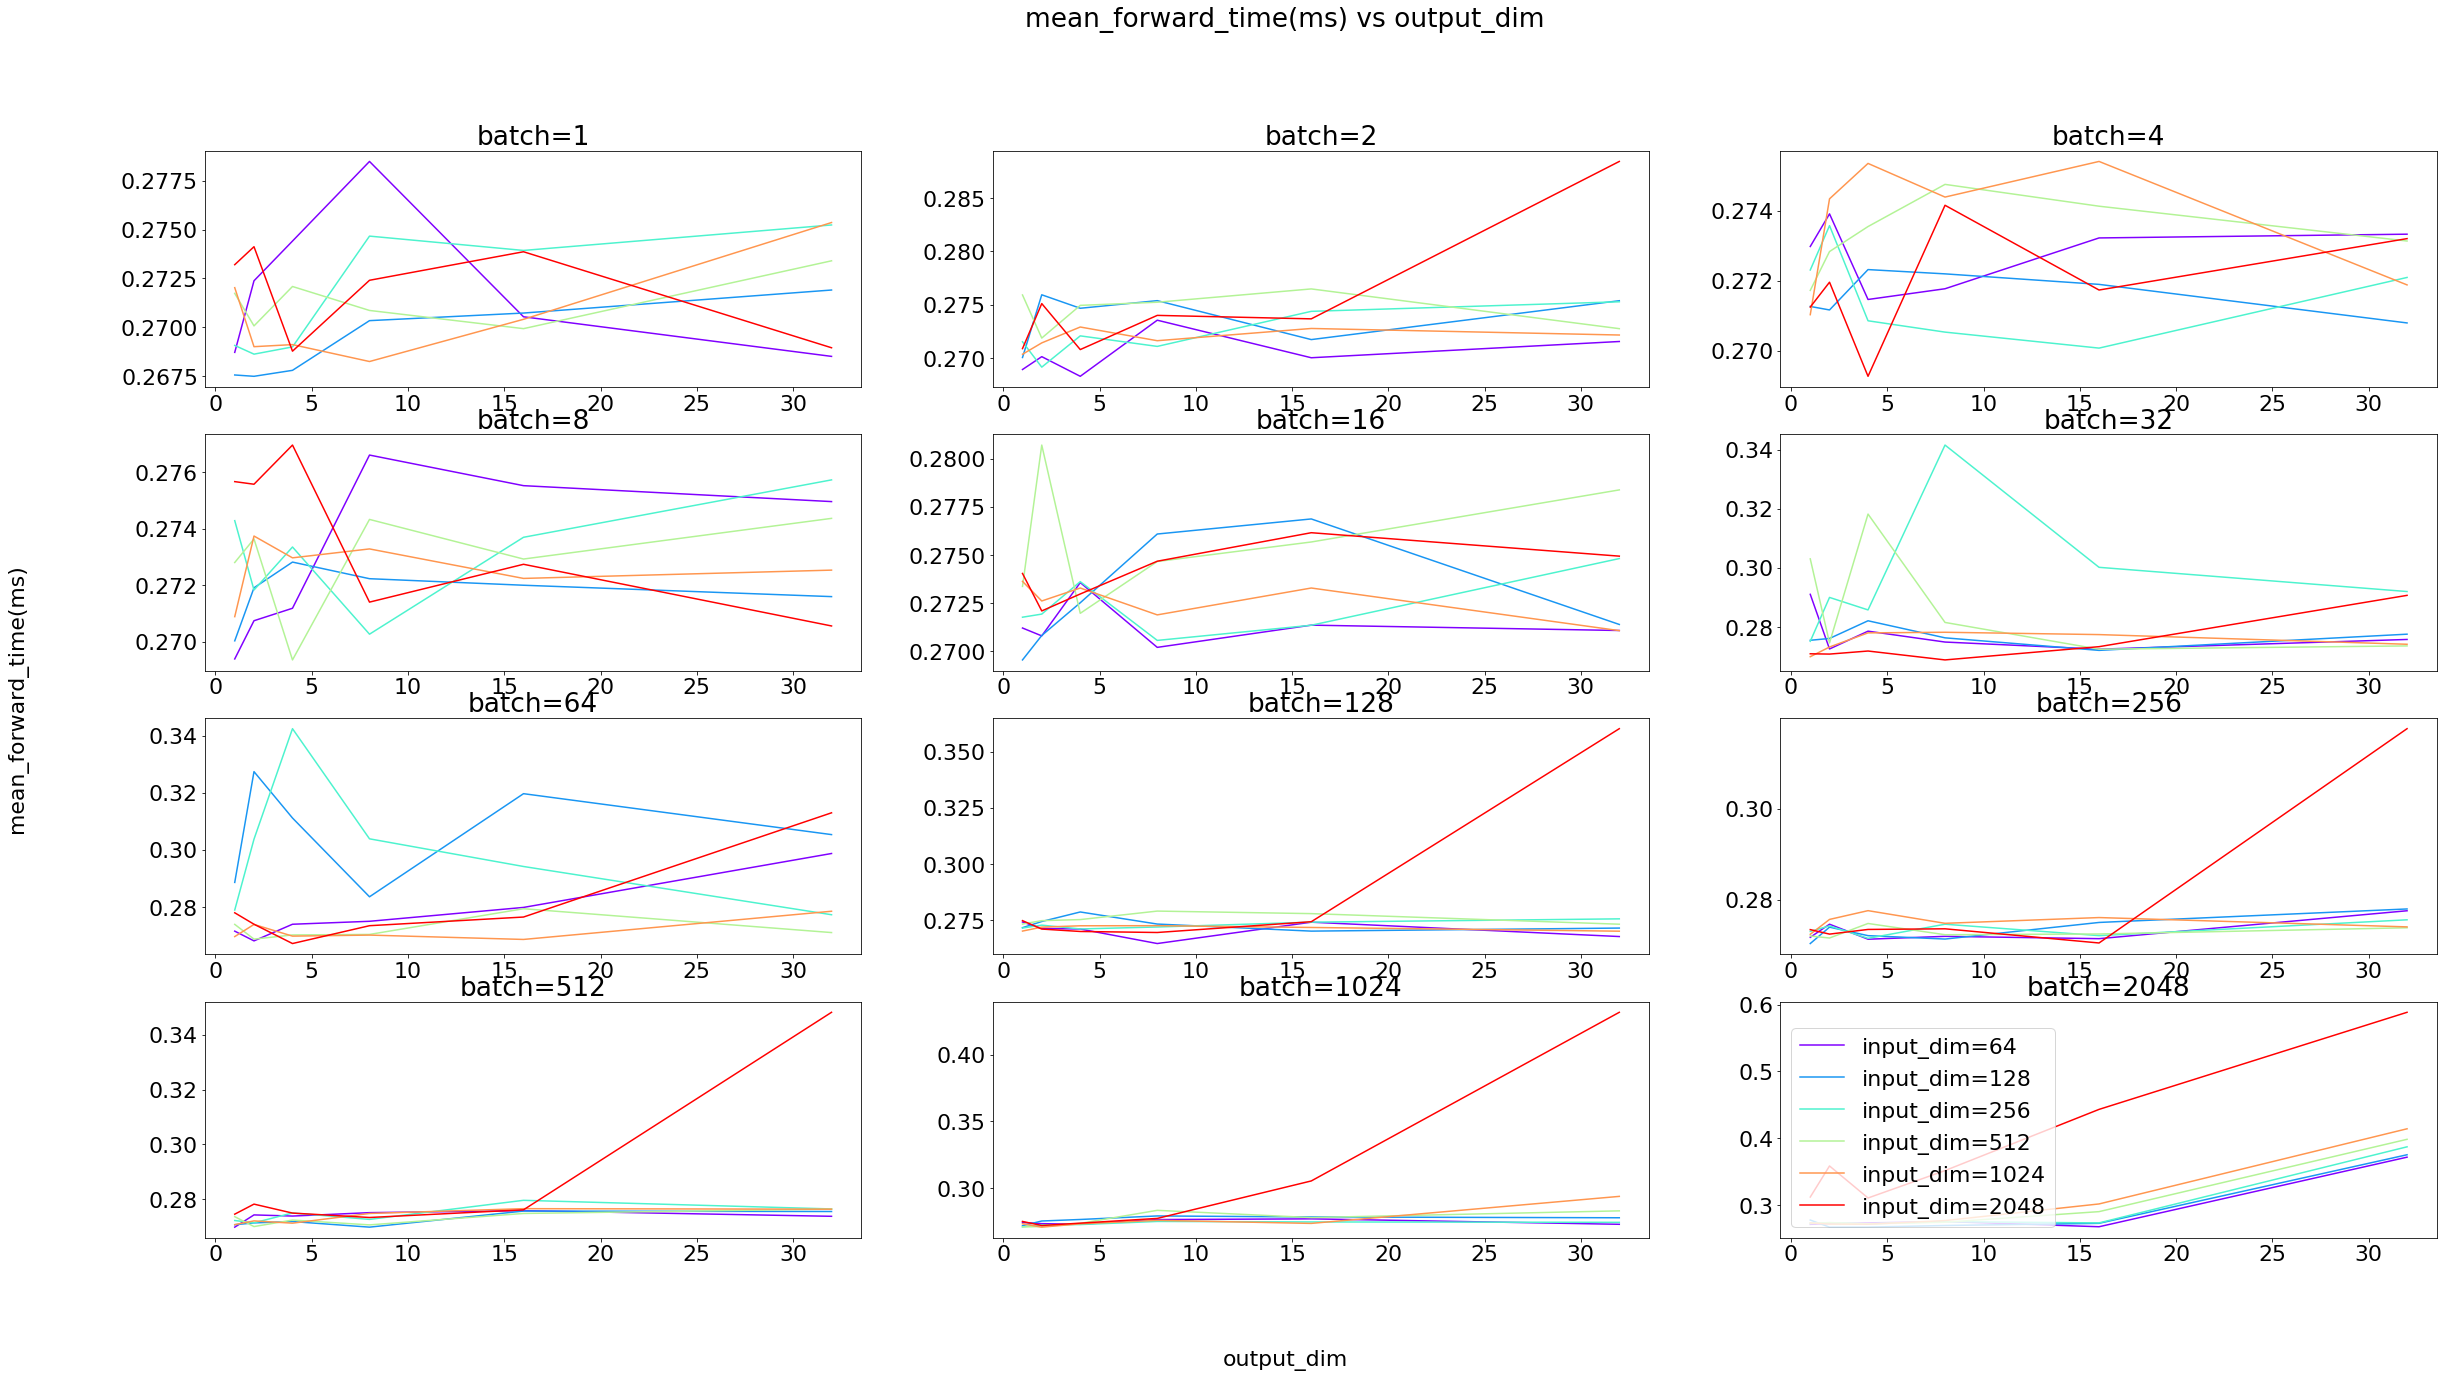

In [115]:
fig, axs = plt.subplots(4, 3)
colors = cm.rainbow(np.linspace(0, 1, len(unique_input_dims)))

for batch_number, batch in enumerate(unique_batches):
    data_batch_j = data[data['batch'] == batch]
    ax = axs.flat[batch_number]
    for number, i in enumerate(unique_input_dims):
        data_batch_j_input_dim_i = data_batch_j[data_batch_j['input_dim'] == i]
        ax.plot([2**i for i in range(len(unique_input_dims))], data_batch_j_input_dim_i['mean_forward_timems'], label='input_dim={}'.format(i), c=colors[number])
        ax.title.set_text('batch={}'.format(batch))
        # ax.set_yscale('log')  # comment this out for normal plot.
        # ax.set_xscale('log')  # comment this out for normal plot.

plt.suptitle('mean_forward_time(ms) vs output_dim')
plt.legend(loc='lower left')
fig.text(0.5, 0.04, 'output_dim', ha='center', va='center')
fig.text(0.06, 0.5, 'mean_forward_time(ms)', ha='center', va='center', rotation='vertical')
# plt.savefig(path_to_csv+'.png')

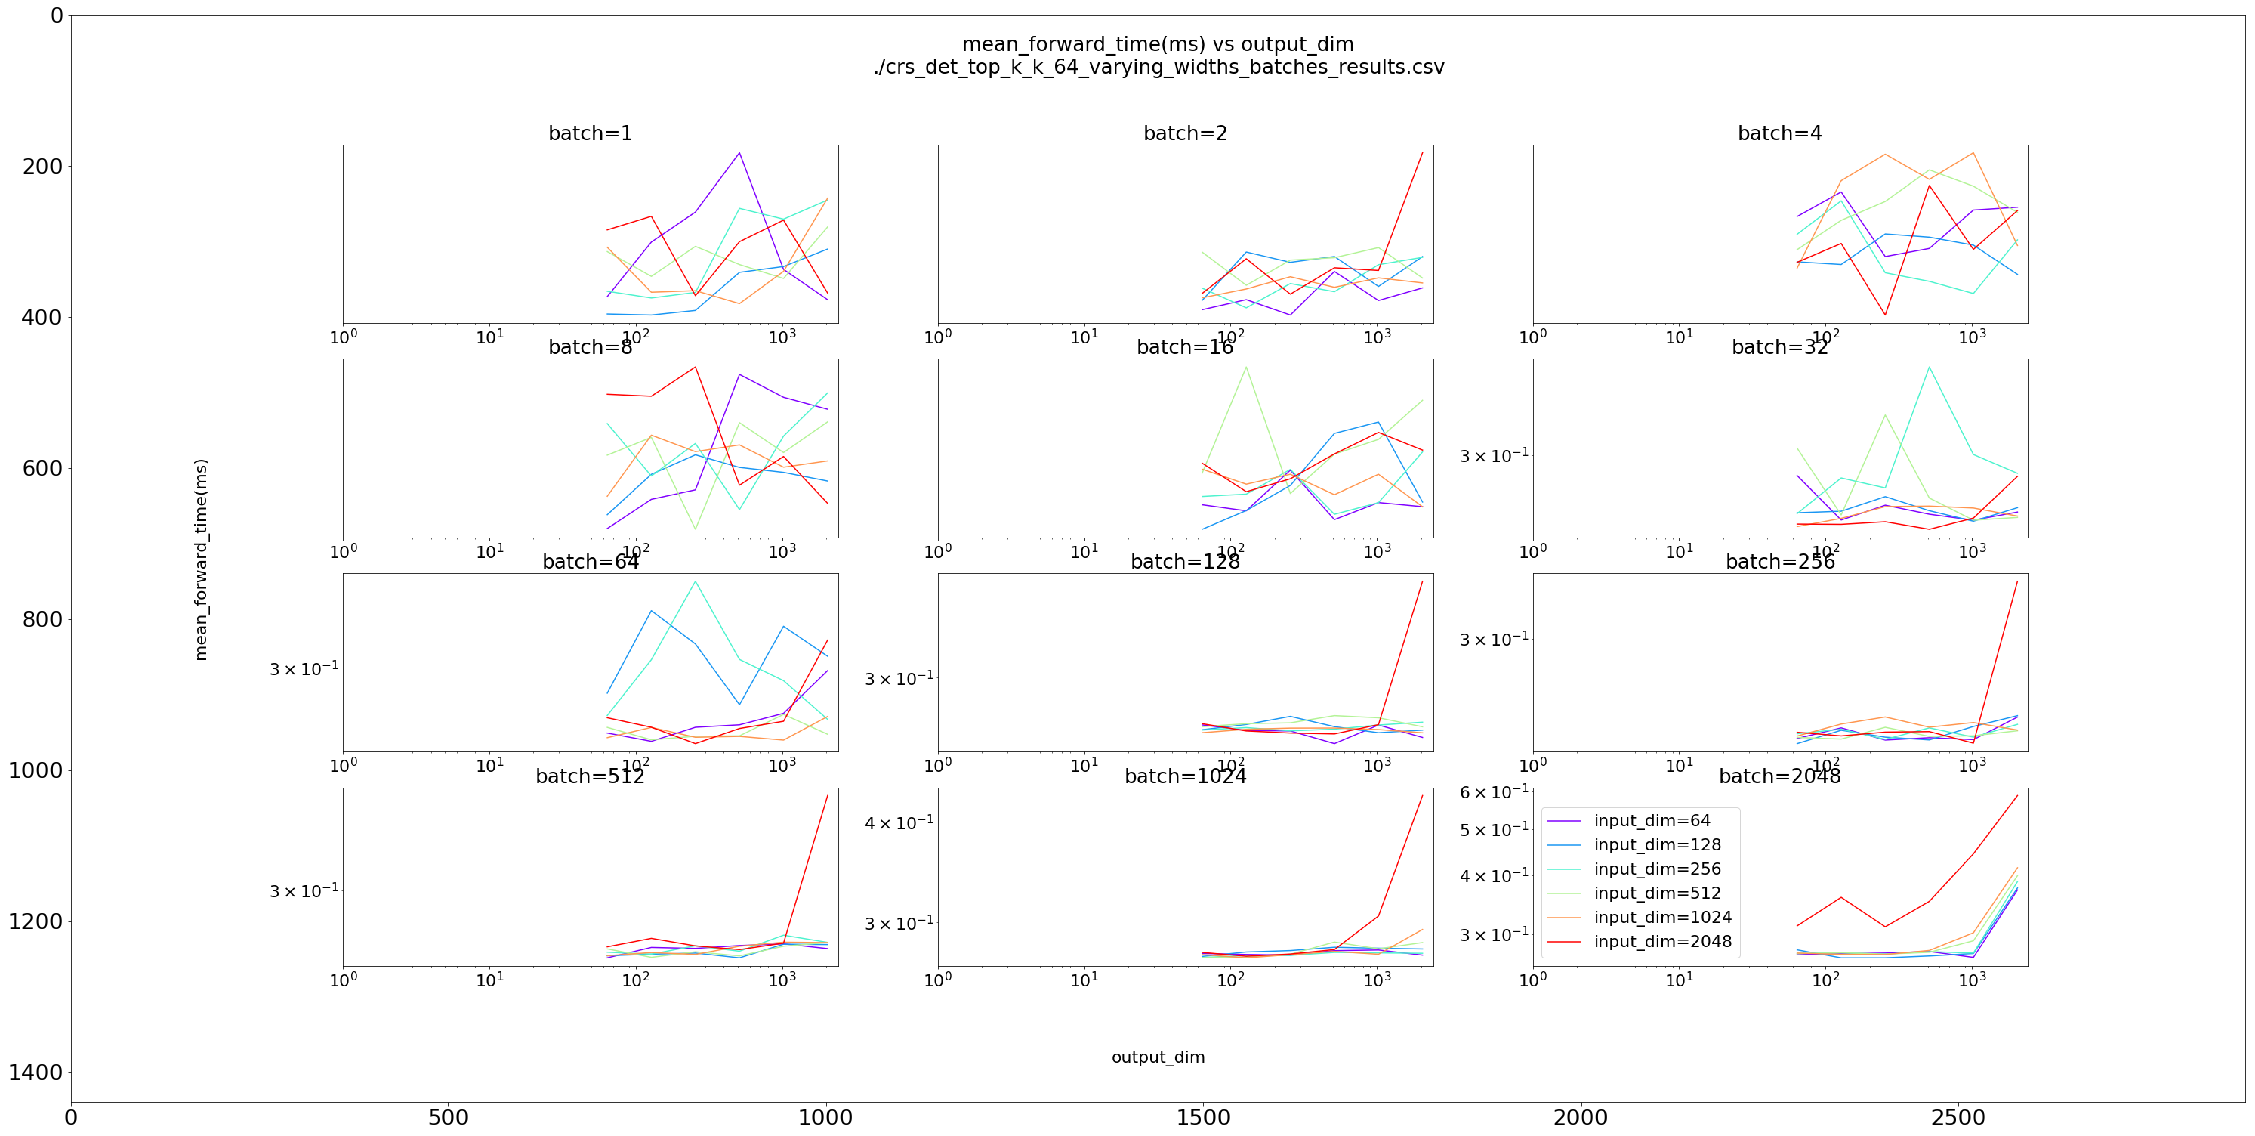

In [129]:
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('./crs_det_top_k_k_64_varying_widths_batches_results.csv.png'))

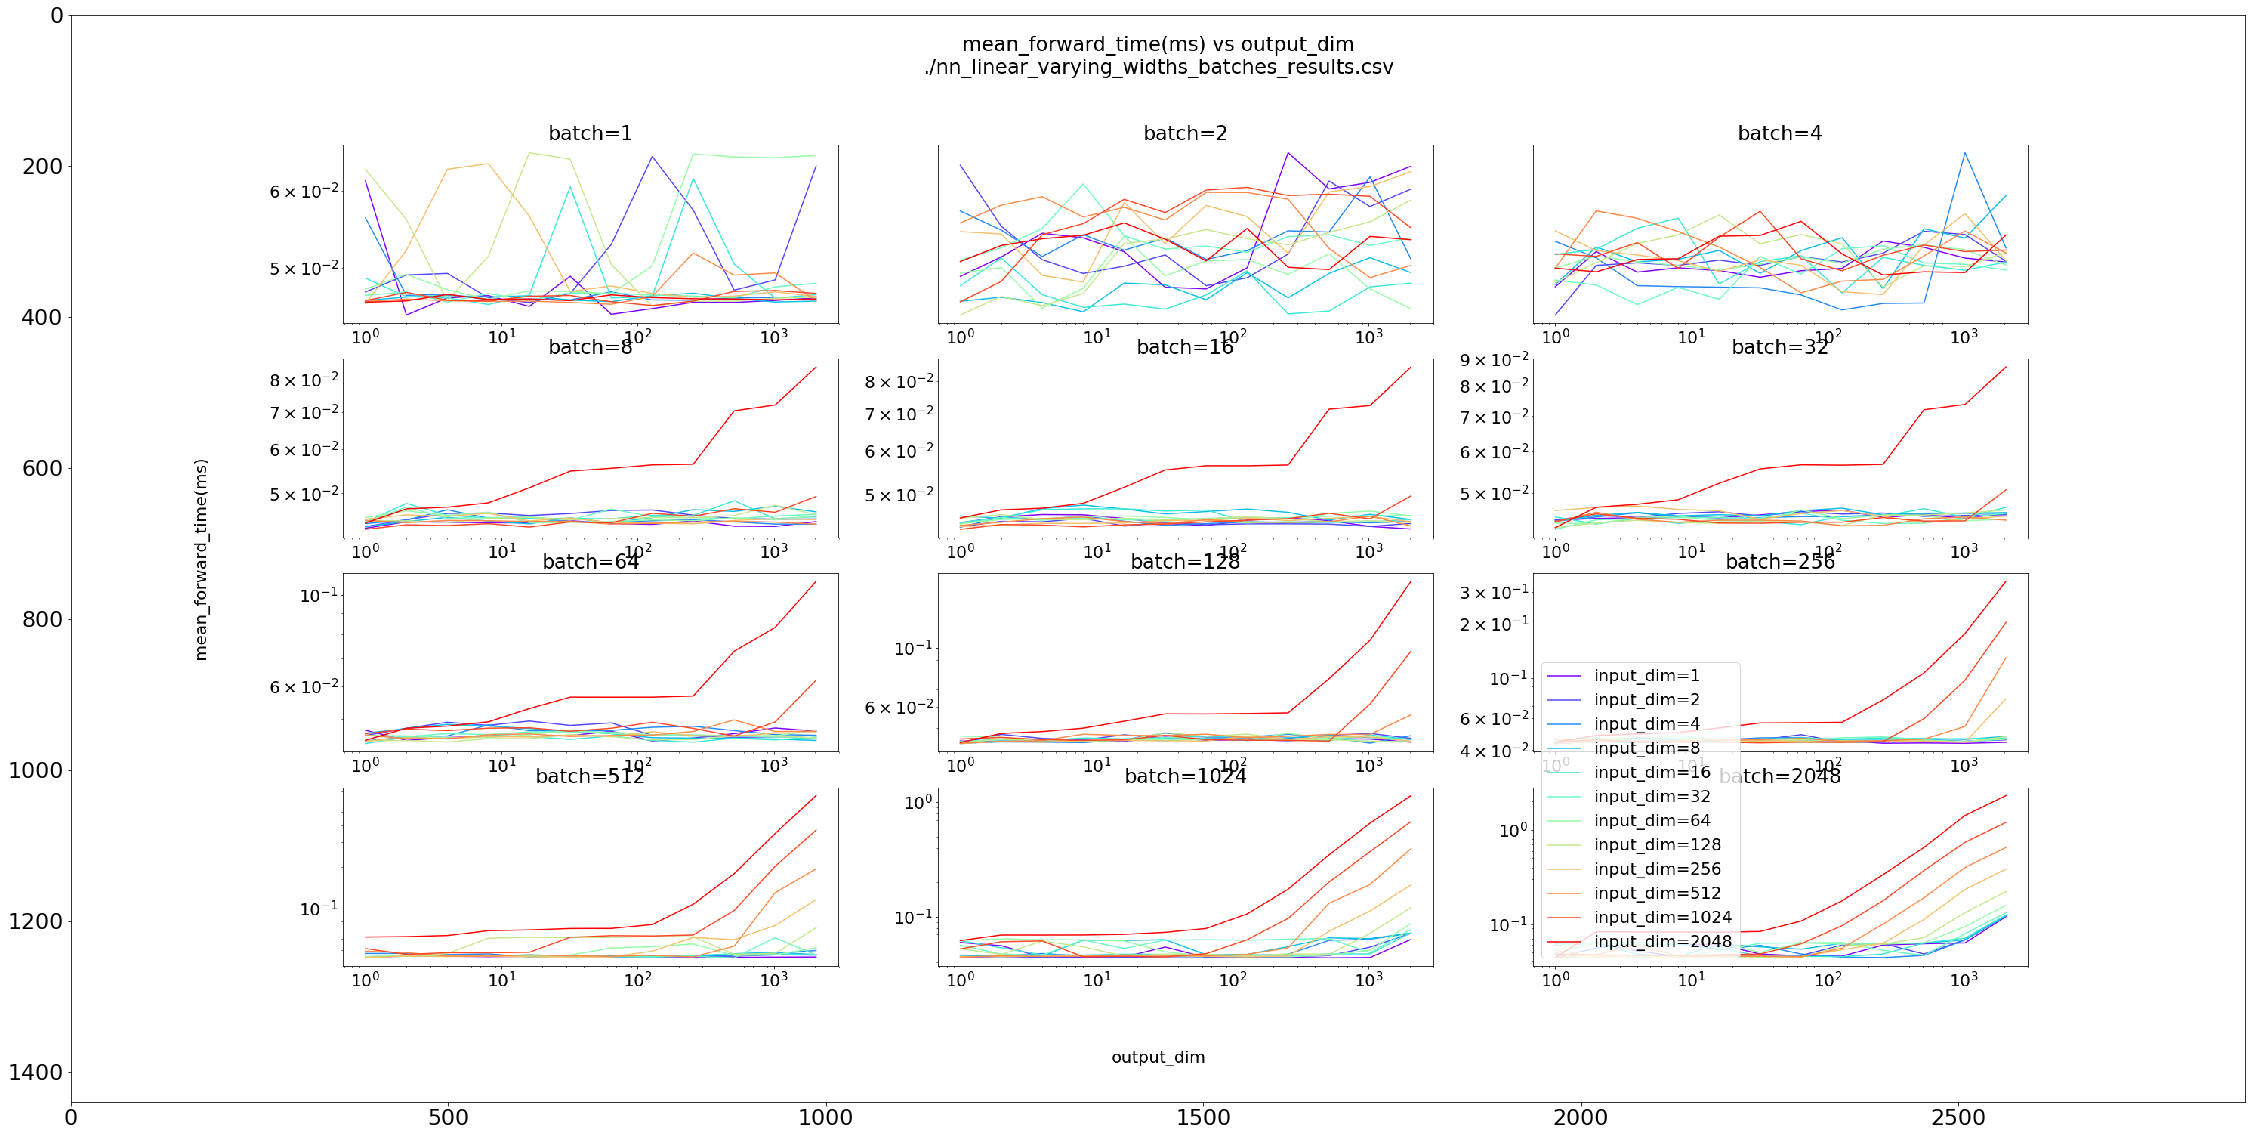

In [128]:
plt.imshow(mpimg.imread('./nn_linear_varying_widths_batches_results.csv.png'))